### **Pr√©traitement des Donn√©es :**

<!-- <code></code> -->

#### **1. Gestion des Valeurs Manquantes :**

La gestion des valeurs manquantes est une √©tape essentielle de l‚Äôanalyse de donn√©es (EDA ‚Äì Exploratory Data Analysis) et du pr√©traitement avant de faire du Machine Learning ou de la visualisation.

Il existe plusieurs approches, en fonction du type de donn√©es et de l‚Äôimportance de la colonne :

- **Suppression des valeurs manquantes :**

    - Supprimer les lignes qui contiennent des valeurs manquantes (<code>dropna()</code> en <code>Pandas</code>).

    - Supprimer les colonnes enti√®res si elles contiennent trop de valeurs manquantes (Utile quand le dataset est assez grand et que la perte d‚Äôinformations est n√©gligeable).

- **Imputation (Remplacement) :**

    - Remplacer les valeurs manquantes par une valeur calcul√©e ou choisie.

    - C‚Äôest la m√©thode la plus utilis√©e car elle permet de conserver toutes les lignes.

- **M√©thodes avanc√©es :**

    - Utiliser des mod√®les statistiques ou de Machine Learning pour pr√©dire les valeurs manquantes (ex : <code>KNN</code> imputer, <code>r√©gression</code>, <code>arbres de d√©cision</code>).

<br>

##### **1.1. Imputation :**

L‚Äôimputation consiste √† remplacer les valeurs manquantes par une estimation appropri√©e. Au lieu de supprimer les donn√©es, on **devine** la valeur manquante √† partir des autres donn√©es disponibles. Cette m√©thode a pour objectif de :

- Conserver un maximum de donn√©es : √âvite de perdre des observations importantes.

- Les mod√®les de Machine Learning ne peuvent pas travailler avec des valeurs manquantes (<code>NaN</code>).

- Am√©liorer la qualit√© des r√©sultats : Une bonne imputation r√©duit les biais et donne de meilleures pr√©dictions.

<br>

**A. Imputation Pour les variables num√©riques :**

Souvent pour les variables num√©riques manquantes, on les remplace par la <code>moyenne</code>, <code>m√©diane</code>, ou <code>mode</code>.

En Pandas, il existe plusieurs fa√ßons de v√©rifier la pr√©sence de valeurs manquantes (<code>NaN</code>).

_**Remarque :**_ Pour notre Dataset , on a aucune variable num√©rique manquantes.

In [ ]:
import pandas as pd

data = pd.read_csv("../data/raw/data.csv")

data.isnull() # Retourne un DataFrame de m√™me taille que data, avec des bool√©ens indiquant la pr√©sence de NaN.

data.isnull().sum() # Affiche le nombre de valeurs manquantes pour chaque colonne.

data.isnull().sum().sum() # Donne le nombre total de cellules manquantes dans ton dataset.

data.isnull().values.any() # Retourne True s‚Äôil existe au moins une valeur manquante dans tout le DataFrame.

data[data.isnull().any(axis=1)] # Affiche toutes les lignes qui contiennent au moins un NaN.

Pour remplacer les valeurs manquantes d‚Äôune variable num√©rique par la m√©diane, on utilise <code>fillna()</code> de Pandas.

In [ ]:
import pandas as pd

data = pd.read_csv("../data/raw/data.csv")

data_copy = data.copy() 

numeric_cols = data_copy.select_dtypes(include=['number']).columns.tolist()

for col in numeric_cols:
    median_value = data_copy[col].median()
    data_copy[col].fillna(median_value, inplace=True)

**B. Imputation Pour les variables cat√©gorielles :**

Les variables qualitatives (cat√©gorielles) se g√®rent un peu diff√©remment des num√©riques, parce qu‚Äôelles ne peuvent pas √™tre remplac√©es par une moyenne ou une m√©diane.

Souvent, on les remplace par le <code>mode</code> (valeur la plus fr√©quente).

_**Remarque :**_ Pour notre Dataset , on a aucune variable cat√©gorielle manquante.

In [ ]:
import pandas as pd

data = pd.read_csv("../data/raw/data.csv")

data_copy = data.copy() 

category_cols = data_copy.select_dtypes(include=['object']).columns.tolist()

for col in category_cols:
    mode_value = data_copy[col].mode()[0]
    data_copy[col].fillna(mode_value, inplace=True)

<br>

#### **2. Gestion des Doublons :**

Les doublons (donn√©es r√©p√©t√©es) sont fr√©quents dans un dataset, surtout quand il vient de bases de donn√©es, d‚ÄôExcel ou d‚Äôune collecte multiple. Ils peuvent fausser les statistiques et les mod√®les, donc il faut les g√©rer.

En Pandas, il existe plusieurs fa√ßons de v√©rifier la pr√©sence des doublons.

In [ ]:
import pandas as pd

data = pd.read_csv("../data/raw/data.csv")

data.duplicated() # Retourne une Series de bool√©ens indiquant si une ligne est un doublon d‚Äôune ligne pr√©c√©dente.

data.duplicated().sum() # Affiche le nombre de lignes dupliqu√©es dans le DataFrame.

data.duplicated().values.any() # Retourne True s‚Äôil existe au moins une ligne dupliqu√©e dans tout le DataFrame.

data[data.duplicated()] # Affiche toutes les lignes qui sont des doublons.

Souvent, on supprime les doublons qu'on a dans notre DataFrame.

En Pandas, on utilise la m√©thode <code>drop_duplicates()</code>.

In [33]:
import pandas as pd

data = pd.read_csv("../data/raw/data.csv")

data_copy = data.copy()

data_copy = data_copy.drop_duplicates() # Supprimer les doublons (en gardant la 1√®re occurrence par d√©faut)

<br>

#### **3. D√©tection et Traitement des Outliers :**

Un <code>outlier</code> (ou valeur aberrante) est une observation qui s‚Äô√©carte fortement des autres donn√©es d‚Äôun jeu de donn√©es. Il peut √™tre beaucoup plus grand ou beaucoup plus petit que la majorit√© des valeurs et peut indiquer soit une erreur de saisie ou de mesure, soit un ph√©nom√®ne rare ou int√©ressant √† analyser. Les outliers sont importants car ils peuvent fausser les statistiques comme la moyenne ou l‚Äô√©cart-type et affecter les mod√®les analytiques.

##### **3.1. Boxplot :**

Un <code>Boxplot</code>, ou diagramme en bo√Æte, est un graphique qui permet de visualiser la distribution d‚Äôune variable num√©rique et d‚Äôidentifier rapidement ses caract√©ristiques principales, comme la <code>m√©diane</code>, les <code>quartiles</code> et les valeurs extr√™mes (<code>outliers</code>).

La bo√Æte repr√©sente l‚Äô√©cart entre le premier quartile (<code>Q1</code> , 25%) et le troisi√®me quartile (<code>Q3</code> , 75%), tandis que la ligne centrale indique la m√©diane (<code>Q2</code>).

Les moustaches montrent l‚Äô√©tendue des donn√©es sans les outliers, g√©n√©ralement jusqu‚Äô√† <code>1,5 fois</code> l‚Äô√©cart interquartile, et les points situ√©s en dehors de ces moustaches correspondent aux outliers. 

Ce graphique est utile pour observer la sym√©trie ou l‚Äôasym√©trie d‚Äôune distribution, d√©tecter des valeurs aberrantes et comparer plusieurs distributions c√¥te √† c√¥te.

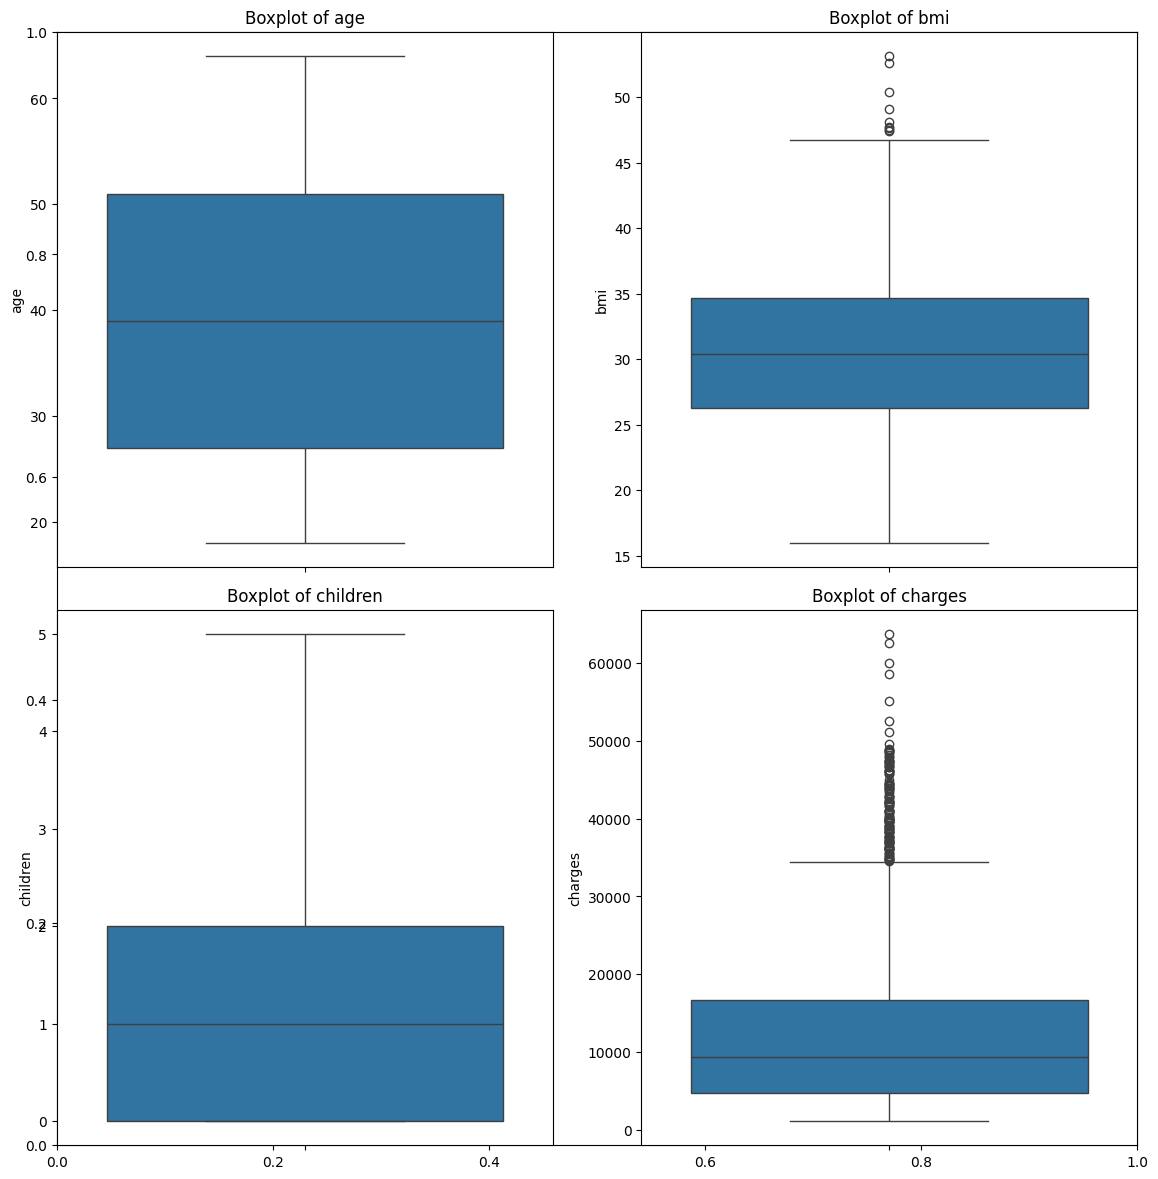

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("../data/raw/data.csv")

numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

plt.subplots(figsize=(12, 12))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

##### **3.2. IQR (Interquartile Range):**

La m√©thode <code>IQR</code> est une technique couramment utilis√©e pour d√©tecter les outliers dans un jeu de donn√©es. Elle repose sur les quartiles de la distribution.

- **D√©finition de l‚ÄôIQR :** 

L‚ÄôIQR est l‚Äô√©cart interquartile, c‚Äôest-√†-dire la diff√©rence entre le troisi√®me quartile (<code>Q3</code>) et le premier quartile (<code>Q1</code>) :                

<h4><center><code center>IQR = Q3 ‚àí Q1</code></center></h4>

- <code>Q1</code> : 25 % des donn√©es sont en dessous

- <code>Q3</code> : 75 % des donn√©es sont en dessous

<br>

- **D√©tection des outliers avec l‚ÄôIQR :**

Une valeur est consid√©r√©e comme outlier si elle est : 

<h4><center>Inf√©rieure¬†√† <code>Q1 ‚àí 1.5 √ó IQR</code></center></h4>

ou

<h4><center>Sup√©rieure √† <code>Q1 + 1.5 √ó IQR</code></center></h4>

La plage <code>[Q1‚àí1.5√óIQR,Q3+1.5√óIQR]</code> est consid√©r√©e comme normaleet toute valeur en dehors de cette plage sont extr√™mes.


In [ ]:
import pandas as pd

data = pd.read_csv("../data/raw/data.csv")

data_copy = data.copy()

numeric_cols = data_copy.select_dtypes(include=['number']).columns.tolist()

for col in numeric_cols:
    Q1 = data_copy[col].quantile(0.25)
    Q3 = data_copy[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = data_copy[(data_copy[col] < Q1 - 1.5 * IQR) | (data_copy[col] > Q3 + 1.5 * IQR)]
    if not outliers.empty:
        print(f'Outliers detected in column {col}:')
        print(outliers.count())
    else:
        print(f'No outliers detected in column {col}.')
    
    print("\n----------------------------------------------------------------------------------\n")

Apr√®s avoir d√©tect√© des outliers, on a plusieurs options selon le contexte et l‚Äôobjectif de notre analyse. Il n‚Äôy a pas de r√®gle stricte, mais voici les approches les plus courantes :

- On peut supprimer les lignes contenant des outliers si elles sont rares et semblent √™tre des erreurs de saisie ou des valeurs aberrantes sans int√©r√™t.

- On peut appliquer des transformations math√©matiques pour r√©duire l‚Äôimpact des outliers : comme Logarithme (<code>log(x)</code>) ou Racine Carr√© (<code>sqrt(x)</code>).

**<h3>Histplot + KDE (Avant la Transformation) :<h3>**

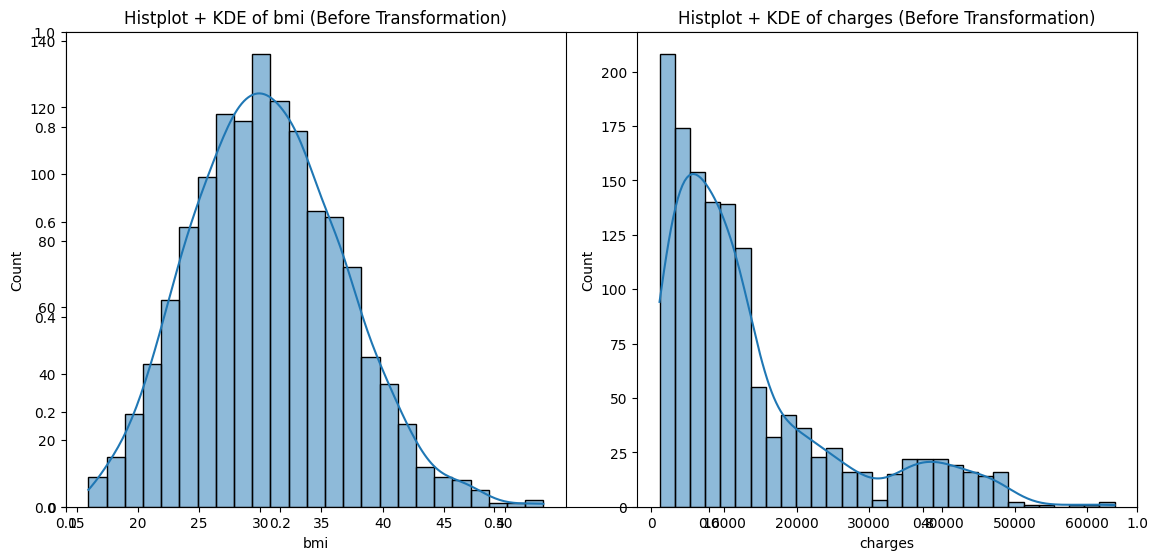

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("../data/raw/data.csv")

data_copy = data.copy()

numeric_cols = data_copy.select_dtypes(include=['number']).columns.tolist()

outliers_cols = []

for col in numeric_cols:
    Q1 = data_copy[col].quantile(0.25)
    Q3 = data_copy[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = data_copy[(data_copy[col] < Q1 - 1.5 * IQR) | (data_copy[col] > Q3 + 1.5 * IQR)]
    if not outliers.empty:
        outliers_cols.append(col)

plt.subplots(figsize=(12, 6))

for i, col in enumerate(outliers_cols):
    plt.subplot(1, len(outliers_cols), i + 1)
    sns.histplot(data_copy[col], kde=True)
    plt.title(f'Histplot + KDE of {col} (Before Transformation)')
    plt.tight_layout()

plt.show()



**<h3>Histplot + KDE (Apr√®s la Transformation Logarithme) :<h3>**

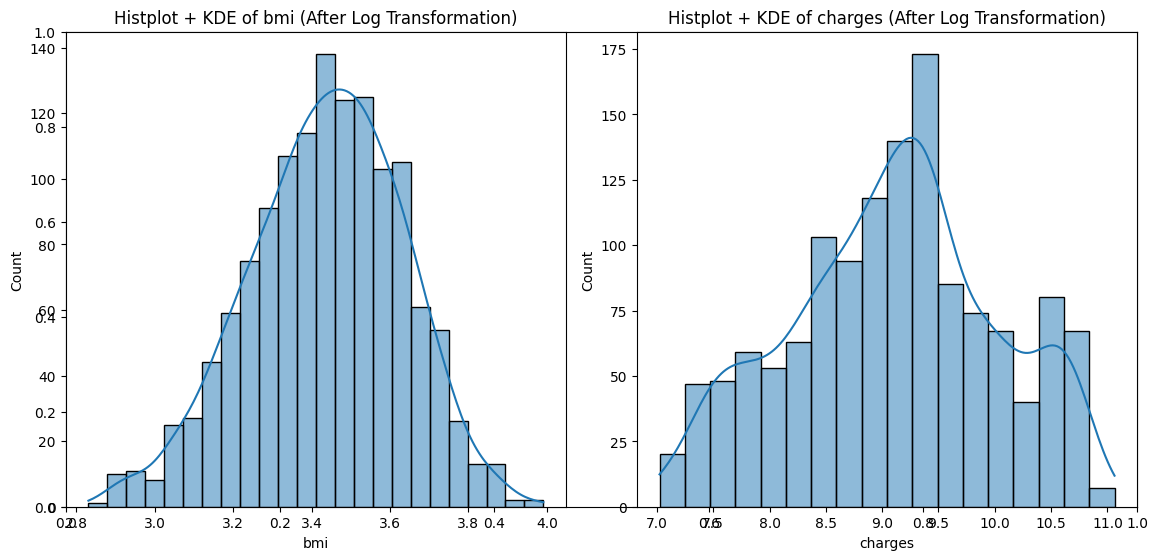

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("../data/raw/data.csv")

data_copy = data.copy()

plt.subplots(figsize=(12, 6))

for i, col in enumerate(outliers_cols):
    data_copy[col] = np.log1p(data_copy[col]) 

    plt.subplot(1, len(outliers_cols), i + 1)
    sns.histplot(data_copy[col], kde=True)
    plt.title(f'Histplot + KDE of {col} (After Log Transformation)')
    plt.tight_layout()

plt.show()

**<h3>Histplot + KDE (Apr√®s Square Root Transformation) :<h3>**

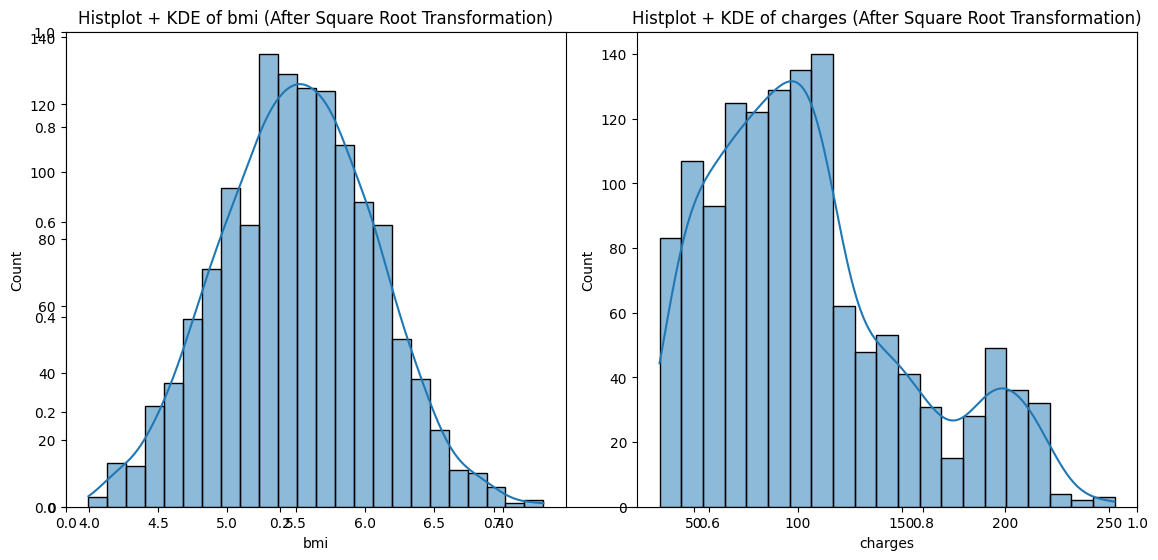

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("../data/raw/data.csv")

data_copy = data.copy()

plt.subplots(figsize=(12, 6))

for i, col in enumerate(outliers_cols):
    data_copy[col] = np.sqrt(data_copy[col]) 

    plt.subplot(1, len(outliers_cols), i + 1)
    sns.histplot(data_copy[col], kde=True)
    plt.title(f'Histplot + KDE of {col} (After Square Root Transformation)')
    plt.tight_layout()

plt.show()

### **Analyse des Histogrammes :**

**A. Avant transformation :**

- <code>BMI</code> : la distribution est assez proche de la normale avec une l√©g√®re asym√©trie √† droite (positive skew).

- <code>Charges</code> : distribution fortement asym√©trique √† droite, avec une longue "queue" (beaucoup d‚Äôoutliers et forte h√©t√©rog√©n√©it√©).


**B. Apr√®s transformation Logarithmique :**

- <code>BMI</code> : la distribution devient encore plus centr√©e et sym√©trique, proche d‚Äôune gaussienne (uniforme).

- <code>Charges</code> : La distribution devient beaucoup plus √©quilibr√©e, les valeurs extr√™mes sont rapproch√©es de la majorit√©, m√™me si on garde une l√©g√®re asym√©trie.

**C. Apr√®s transformation Racine Carr√©e :**

- <code>BMI</code> : l√©g√®re am√©lioration, mais moins efficace que la transformation log (toujours un peu √©tal√© √† droite).

- <code>Charges</code> : la transformation ‚àö r√©duit un peu l‚Äôasym√©trie, mais la courbe reste assez d√©s√©quilibr√©e par rapport au log.

<br>

#### **Conclusion :**

- Pour BMI, les deux transformations (log et racine) am√©liorent la distribution, mais le logarithme est plus efficace pour obtenir une distribution quasi normale.

- Pour Charges, la transformation log est clairement la meilleure car elle r√©duit beaucoup plus la skewness et rend la distribution exploitable pour les mod√®les sensibles aux outliers.

Donc **la meilleure transformation √† adopter est <code>le logarithme</code>** pour les deux colonnes (surtout charges).

<br>

#### **4. Encodage des Variables Cat√©goriques :**

Dans un dataset, tu as deux types de variables : Num√©riques et Cat√©gorielles.

Les algorithmes de Machine Learning comprennent uniquement les nombres, pas les textes. Donc, l‚Äôencodage sert √† transformer les variables cat√©gorielles en variables num√©riques pour que le mod√®le puisse les utiliser.

##### **4.1. LabelEncoder:**

<code>LabelEncoder</code> sert √† transformer chaque cat√©gorie en un entier unique. On l'utilise souvent pour les variables binaires (ex. Homme/Femme, Oui/Non).

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("../data/raw/data.csv")

le = LabelEncoder() # Initialiser le Label Encoder

data_encoded = data.copy() # Cr√©er une copie du DataFrame original pour √©viter de modifier les donn√©es d'origine

data_encoded['sex'] = le.fit_transform(data_encoded['sex']) # Appliquer le Label Encoding √† la colonne Sex

data_encoded['smoker'] = le.fit_transform(data_encoded['smoker']) # Appliquer le Label Encoding √† la colonne Smoker

print(data_encoded.head()) # Afficher les premi√®res lignes du DataFrame encod√©

##### **4.2. OneHotEncoder :**

<code>OneHotEncoder</code>cr√©e une nouvelle colonne pour chaque cat√©gorie, avec des 0 et 1. On l'utilise souvent quand oon as une variable cat√©gorielle avec plusieurs modalit√©s (plus de 2 valeurs).

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("../data/raw/data.csv")

data_copy = data.copy()

ohe = OneHotEncoder(sparse_output=False)

region_encoded = ohe.fit_transform(data_copy[['region']]) # Appliquer le One-Hot Encoding √† la colonne Region

columns = ohe.categories_[0] # Obtenir les noms des nouvelles colonnes cr√©√©es par le One-Hot Encoding

encoded_data = pd.DataFrame(region_encoded, columns=columns) # Cr√©er un DataFrame avec les donn√©es encod√©es et les noms de colonnes appropri√©s

data_copy = pd.concat([data_copy.drop("region", axis=1), encoded_data], axis=1) # Supprimer la colonne originale "region" et ajouter les nouvelles colonnes encod√©es

new_order = ['age', 'sex', 'smoker', 'northwest', 'southwest', 'northeast', 'southeast', 'charges']

data_copy = data_copy[new_order]

print(data_copy.head()) # Afficher les premi√®res lignes du DataFrame avec le One-Hot Encoding appliqu√©

<br>

### **Code Complet de Nettoyage du Dataset (Encoding + Outliers Log Transform) :**

In [106]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import *

data = pd.read_csv("../data/raw/data.csv")

data_copy = data.copy()

le = LabelEncoder()
ohe = OneHotEncoder(sparse_output=False)


# Appliquer Label Encoding
data_copy['sex'] = le.fit_transform(data_copy['sex'])
data_copy['smoker'] = le.fit_transform(data_copy['smoker'])


# Appliquer One-Hot Encoding
region_encoded = ohe.fit_transform(data_copy[['region']])
columns = ohe.categories_[0]
encoded_data = pd.DataFrame(region_encoded, columns=columns)
data_copy = pd.concat([data_copy.drop("region", axis=1), encoded_data], axis=1)
new_order = ['age', 'sex', 'smoker', 'bmi', 'children','northwest', 'southwest', 'northeast', 'southeast', 'charges']


# Data Apr√®s Encoding
data_copy = data_copy[new_order]


# Appliquer Log Transformation
outliers_cols = ['bmi', 'charges']
for col in outliers_cols:
    data_copy[col] = np.log1p(data_copy[col])

# Data Apr√®s Encoding + Log Transform
data_cleaned = data_copy

print(data_cleaned.head())

   age  sex  smoker       bmi  children  northwest  southwest  northeast  \
0   19    0       1  3.363842         0        0.0        1.0        0.0   
1   18    1       0  3.548755         1        0.0        0.0        0.0   
2   28    1       0  3.526361         3        0.0        0.0        0.0   
3   33    1       0  3.165686         0        1.0        0.0        0.0   
4   32    1       0  3.397189         0        1.0        0.0        0.0   

   southeast   charges  
0        0.0  9.734236  
1        1.0  7.453882  
2        1.0  8.400763  
3        0.0  9.998137  
4        0.0  8.260455  


<br>

#### **5. Standarisation et Normalisation des Donn√©es :**

La <code>Standarisation</code> et la <code>Normalisation</code> sont deux points fondamentaux du pr√©traitement des donn√©es en Machine Learning. En gros, ils sert √† mettre √† l‚Äô√©chelle les variables num√©riques.

##### **5.1. Standarisation :**

La standardisation consiste √† transformer les donn√©es pour qu‚Äôelles aient :

- une moyenne = 0

- un √©cart-type = 1

Elle sert √† :

- Rendre les donn√©es comparables.

- Utile quand on suppose que les donn√©es suivent (ou approximativement) une <code>distribution normale</code>.

- Tr√®s utilis√© dans les mod√®les lin√©aires et ceux bas√©s sur optimisation (<code>r√©gression lin√©aire</code>, r√©gression logistique, PCA, SVM).

Fonctionnement :

- Formule classique (Z-score Normalization) :

<center><h3><code>ùë•‚Ä≤ = (ùë• - ùúá) / ùúé</code></h3></center>

- ùúá = moyenne

- ùúé = √©cart-type

In [123]:
import pandas as pd
from sklearn.preprocessing import *

scaler = StandardScaler()

data_copy = data_cleaned[['age', 'children']]

data_copy_scaled = scaler.fit_transform(data_copy)

data_copy_scaled = pd.DataFrame(data_copy_scaled, columns=data_copy.columns)

data_scaled = pd.concat([data_copy_scaled, data_cleaned.drop(['age', 'children'], axis=1).reset_index(drop=True)], axis=1)

print(data_scaled.mean()) 
print(data_scaled.std()) 

data_scaled.to_csv("../data/processed/data.csv", index=True)

age         -1.805565e-16
children    -5.576008e-17
sex          5.052317e-01
smoker       2.047833e-01
bmi          3.436333e+00
northwest    2.428999e-01
southwest    2.428999e-01
northeast    2.421525e-01
southeast    2.720478e-01
charges      9.098828e+00
dtype: float64
age          1.000374
children     1.000374
sex          0.500160
smoker       0.403694
bmi          0.195690
northwest    0.428995
southwest    0.428995
northeast    0.428546
southeast    0.445181
charges      0.919379
dtype: float64


##### **5.2. Normalisation :**

La normalisation consiste √† ramener les valeurs d‚Äôune variable dans une m√™me plage, en g√©n√©ral entre <code>0</code> et <code>1</code> (parfois entre -1 et 1).

Elle sert √† :

- Mettre toutes les variables sur la m√™me √©chelle (surtout utile si les unit√©s sont diff√©rentes).

- √âviter que les variables avec de grandes valeurs (ex : <code>charges</code>) dominent celles avec de petites valeurs (ex : <code>age</code>).

- Tr√®s utile pour les mod√®les sensibles aux distances (<code>KNN</code>, <code>K-Means</code>, <code>R√©gression logistique</code>, <code>R√©seaux de neurones</code>).

Fonctionnement :

- M√©thode classique : Min-Max Scaling

<center><h3><code>ùë•‚Ä≤ = (ùë• - ùë•<sub>min</sub>) / (ùë•<sub>max</sub> - ùë•<sub>min</sub>)</code></h3></center>

Transforme chaque valeur pour √™tre comprise entre 0 et 1.

In [ ]:
import pandas as pd
from sklearn.preprocessing import *

scaler = MinMaxScaler(feature_range=(0, 1))

data_copy = data_cleaned[['age', 'children']]

data_copy_normalized = scaler.fit_transform(data_copy)

data_copy_normalized = pd.DataFrame(data_copy_normalized, columns=data_copy.columns)

data_normalized = pd.concat([data_copy_normalized, data_cleaned.drop(['age', 'children'], axis=1).reset_index(drop=True)], axis=1)

print(data_normalized.min())
print(data_normalized.max())

<br>

#### **6. Division des donn√©es en ensembles d'Entra√Ænement et de Test :**

Lorsqu'on fini le nettoyage, la transformation et la standarisation des donn√©es, on dois diviser notre dataset en deux parties :

- **Training set (80%) :** utilis√© pour entra√Æner ton mod√®le.

- **Test set (20%) :** utilis√© pour √©valuer ton mod√®le avec des donn√©es qu‚Äôil n‚Äôa jamais vues.

Cette √©tape est importante pour √©viter le surapprentissage (overfitting).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("../data/processed/data.csv")

# S√©parer les features (X) et la cible (y)
X = data.drop("charges", axis=1)  # toutes les colonnes sauf la colonne 'charges'
Y = data["charges"]               # la colonne cible

# Diviser les donn√©es en training et test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,          # les donn√©es √† s√©parer
    test_size=0.2, # 20% pour le test, 80% pour l'entra√Ænement
    random_state=42 # graine al√©atoire pour rendre la s√©paration reproductible
)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
